# Logistic Regression

### Theory

Logistic regression is a method for classifying data into discrete outcomes.

Examples:
- Spam vs. "Ham" email
- Loan default (yes/no)
- Disease diagnosis (positive/negative)

Where:

- $z$ is the input variable and $f(z)$ is the output
- $e$ is the base of the natural logarithm, which is a constant, approximately equal to 2.71828

$$f(z) = \frac{1}{1 + e^{-z}}$$

Regardless of the value of $z$, the result is a value between 0 and 1.

In a linear model, $y = \beta_0 + b_1x$. In a logistic model:

$$p = \frac{1}{1 + e^{\beta_0 + b_1x}}$$



The threshold value for **this specific example** is 0.5 - the threshold value should be calculated based on the problem at hand.

After setting the threshold, any value above it is classified as 1, and any value below it is classified as 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

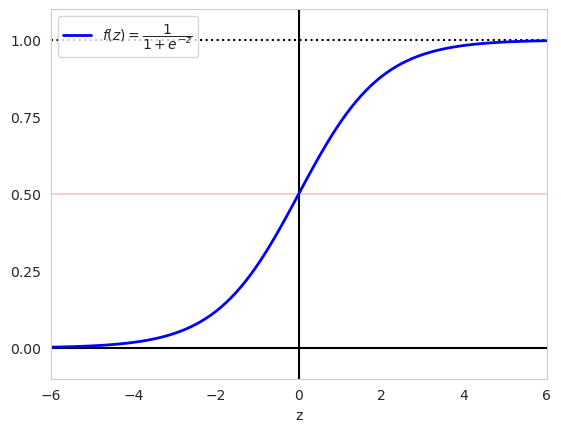

In [2]:
lim = 6
z = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-z))

plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], c="red", alpha=0.2)
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, c="blue", linewidth=2, label=r"$f(z) = \dfrac{1}{1 + e^{-z}}$")
plt.xlabel("z")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

### Model Evaluation

#### Confusion Matrix

We can use a confusion matrix to evaluate the model.

The general idea is to count the number of times the model predicted the class incorrectly.

- True positive (TP): The model correctly predicted the positive class.
- True negative (TN): The model correctly predicted the negative class.
- False positive (FP): The model incorrectly predicted the positive class (aka Type I error).
- False negative (FN): The model incorrectly predicted the negative class (aka Type II error).

|                 | Predicted: NO | Predicted: YES |
|-----------------|---------------|----------------|
| **Actual: NO**  | TN            | FP             |
| **Actual: YES** | FN            | TP             |


The *precision* of the model is calculated as $\frac{\sum{TP}}{\sum{TP} + \sum{FP}}$

In scikit-learn, we can use the `precision_score` function.

The *recall* (synonym *sensitivity*) is the proportion of *positive* instances that the model correctly predicted: $$\frac{TP}{TP + FN}$$

In scikit-learn, we can use the `recall_score` function.

The *specificity* is the proportion of *negative* instances that the model correctly predicted: $$\frac{TN}{TN + FP}$$

Scikit-learn does not have a function for specificity, but we can the `pos_label=0` parameter to the `recall_score` function.

The *F1 score* combines precision and recall. It's the *harmonic mean* of precision and recall, and gives more weight to low values: $$\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

In scikit-learn, we can use the `f1_score` function.

### Examples

#### Example 1

In [3]:
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv('./data/hearing_test.csv')

In [58]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [59]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

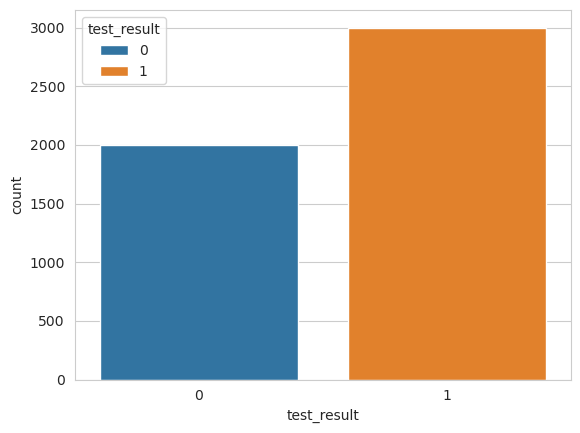

In [74]:
sns.countplot(x='test_result', data=df, hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

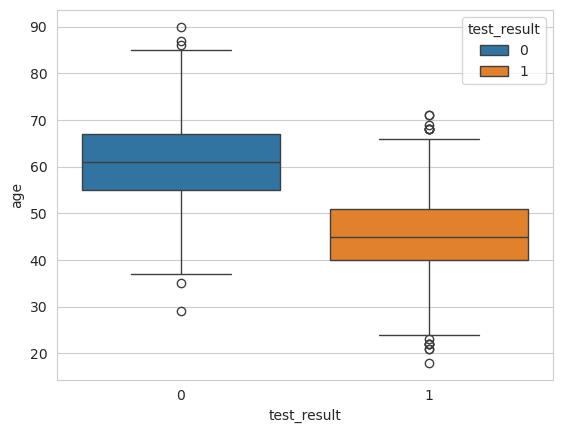

In [73]:
sns.boxplot(x='test_result', y='age', data=df, hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

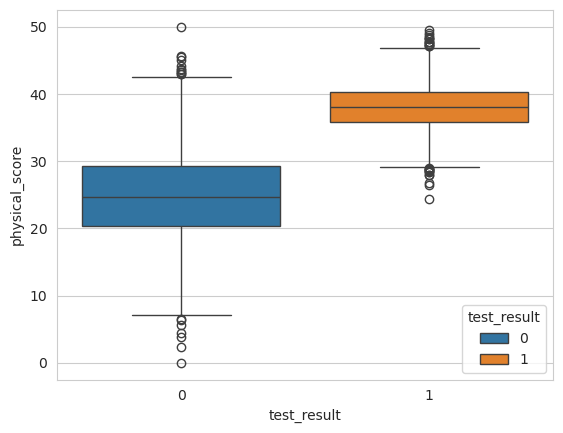

In [72]:
sns.boxplot(x='test_result', y='physical_score', data=df, hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

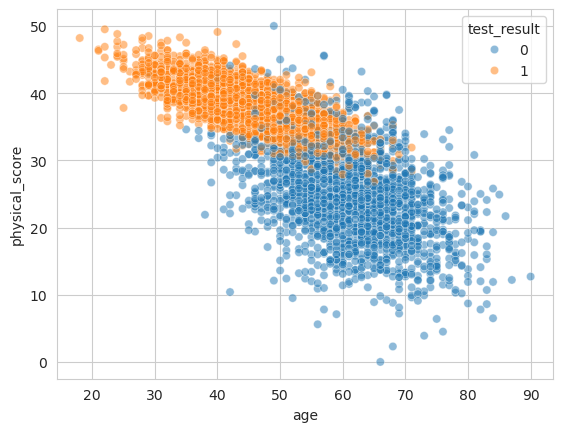

In [75]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

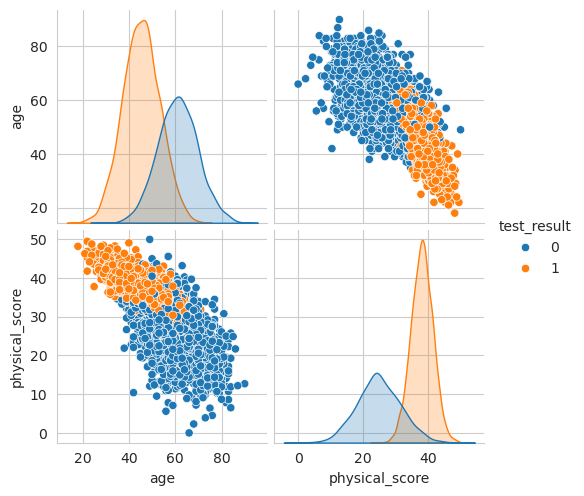

In [77]:
sns.pairplot(df, hue='test_result')

<Axes: >

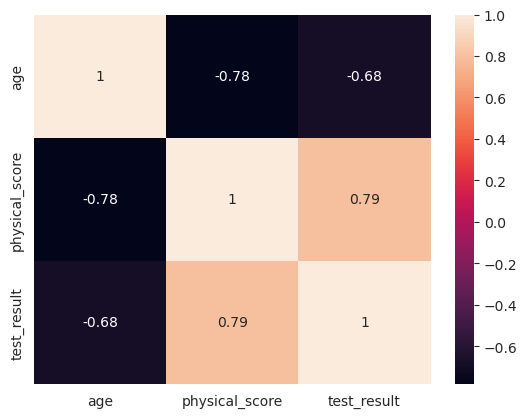

In [78]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

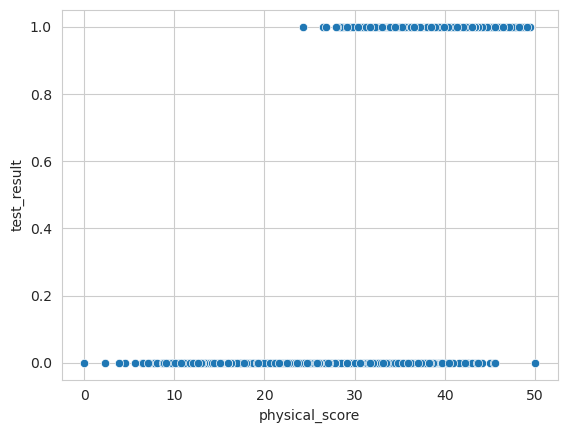

In [81]:
sns.scatterplot(x='physical_score',y='test_result', data=df)

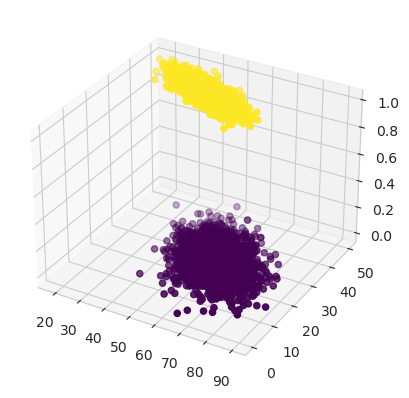

In [88]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'], cmap='viridis')

In [89]:
X = df.drop('test_result', axis=1)
y = df['test_result']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [92]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [93]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [113]:
y_pred = log_model.predict(scaled_X_test)

In [108]:
accuracy_score(y_test,y_pred)

0.93

In [116]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

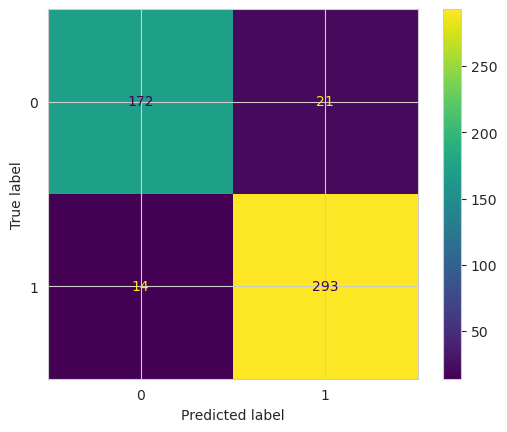

In [121]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

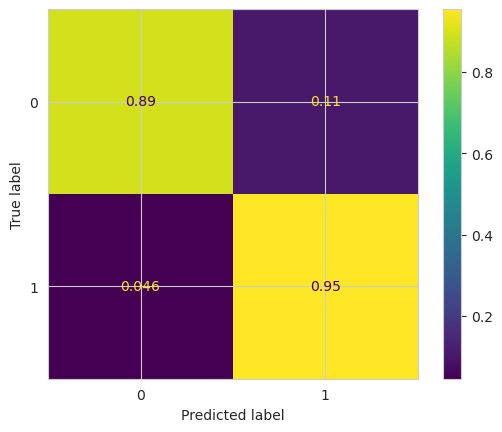

In [122]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [124]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [125]:
y_train.iloc[0]

np.int64(1)

In [126]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [127]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

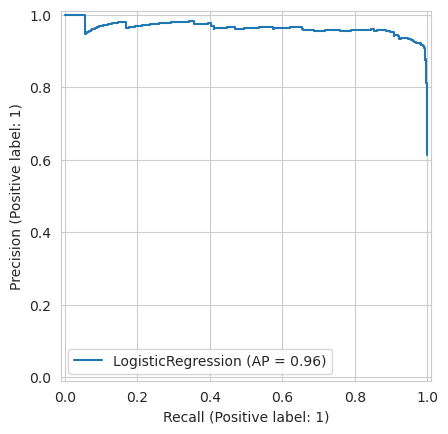

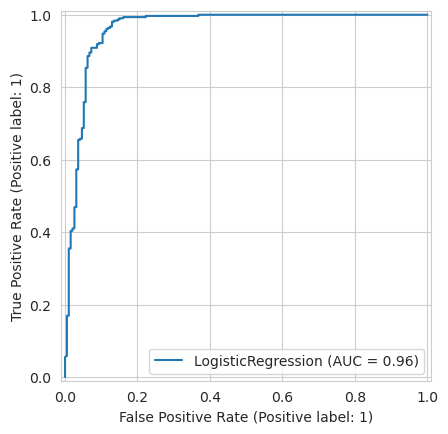

In [129]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

#### Example 2 - Multi-class Logistic Regression

In [142]:
df = pd.read_csv('./data/iris.csv')

In [143]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [146]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

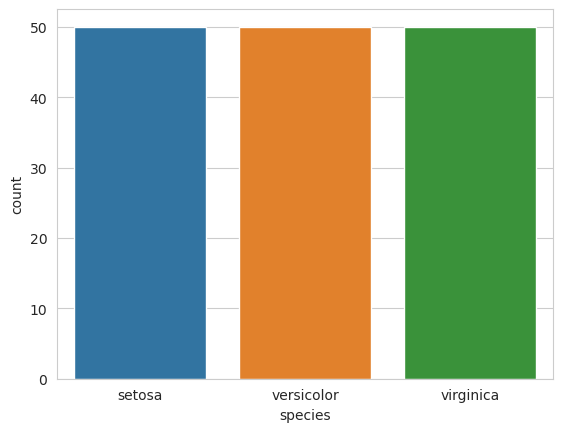

In [148]:
sns.countplot(x='species', data=df, hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

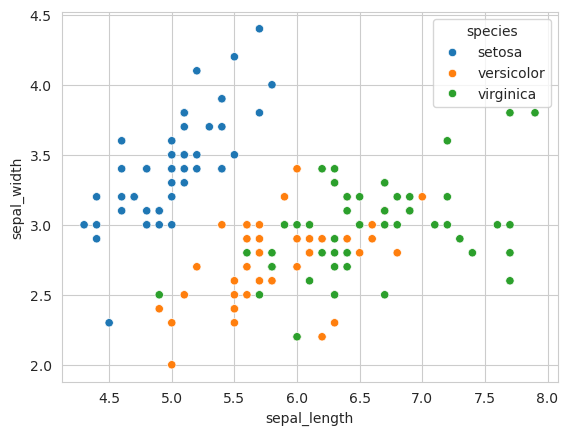

In [149]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

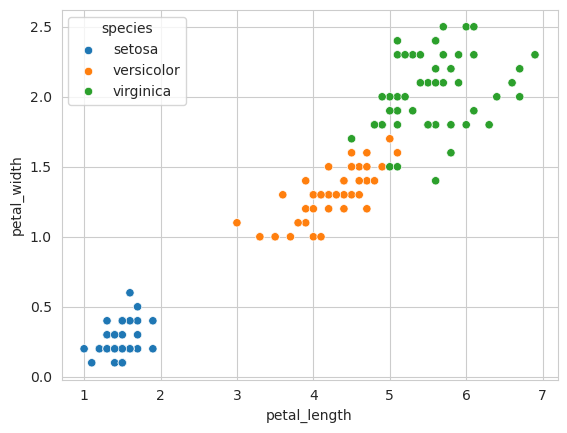

In [150]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

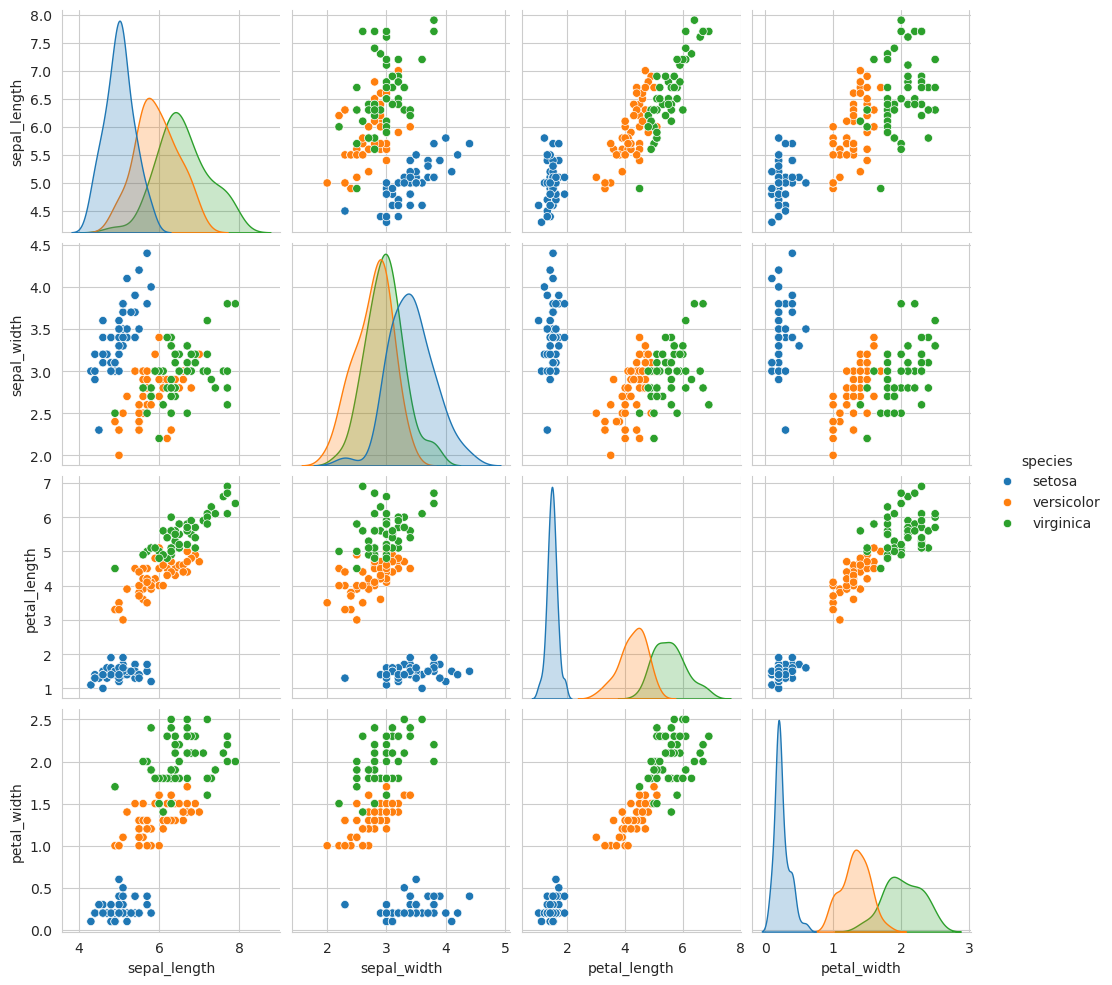

In [151]:
sns.pairplot(df,hue='species')

<Axes: >

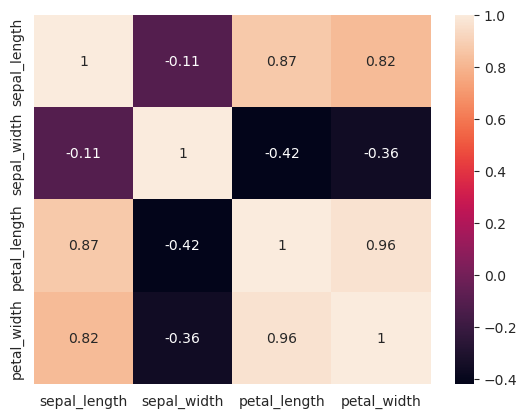

In [153]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [154]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

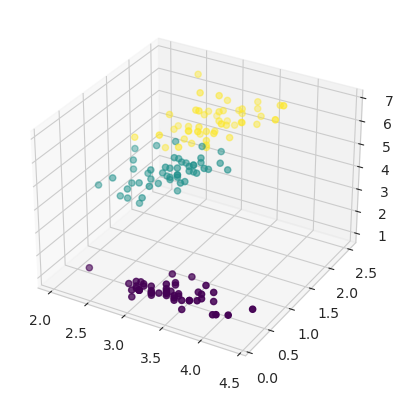

In [162]:
from sklearn.preprocessing import LabelEncoder

# Encode the species column
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_width'], df['petal_width'], df['petal_length'], c=df['species_encoded'], cmap='viridis')
plt.show()

In [163]:
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [192]:
from sklearn.multiclass import OneVsRestClassifier

log_model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=5000))

In [193]:
from sklearn.model_selection import GridSearchCV

In [197]:
param_grid = {
    'estimator__C': np.logspace(0, 4, 10),
    'estimator__penalty': ['l1', 'l2']
}

In [199]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [200]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [201]:
grid_model.best_params_

{'estimator__C': np.float64(7.742636826811269), 'estimator__penalty': 'l1'}

In [202]:
y_pred = grid_model.predict(scaled_X_test)

In [203]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [204]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

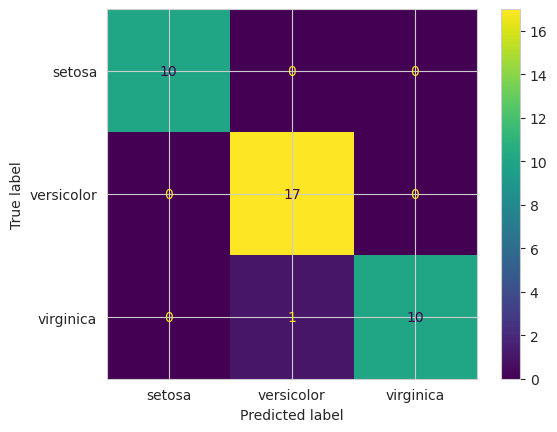

In [205]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test)

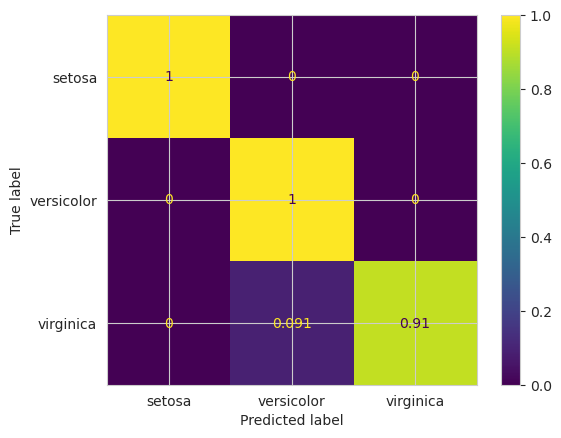

In [206]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test,normalize='true')

In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [208]:
from sklearn.metrics import roc_curve, auc

In [209]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5, 5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

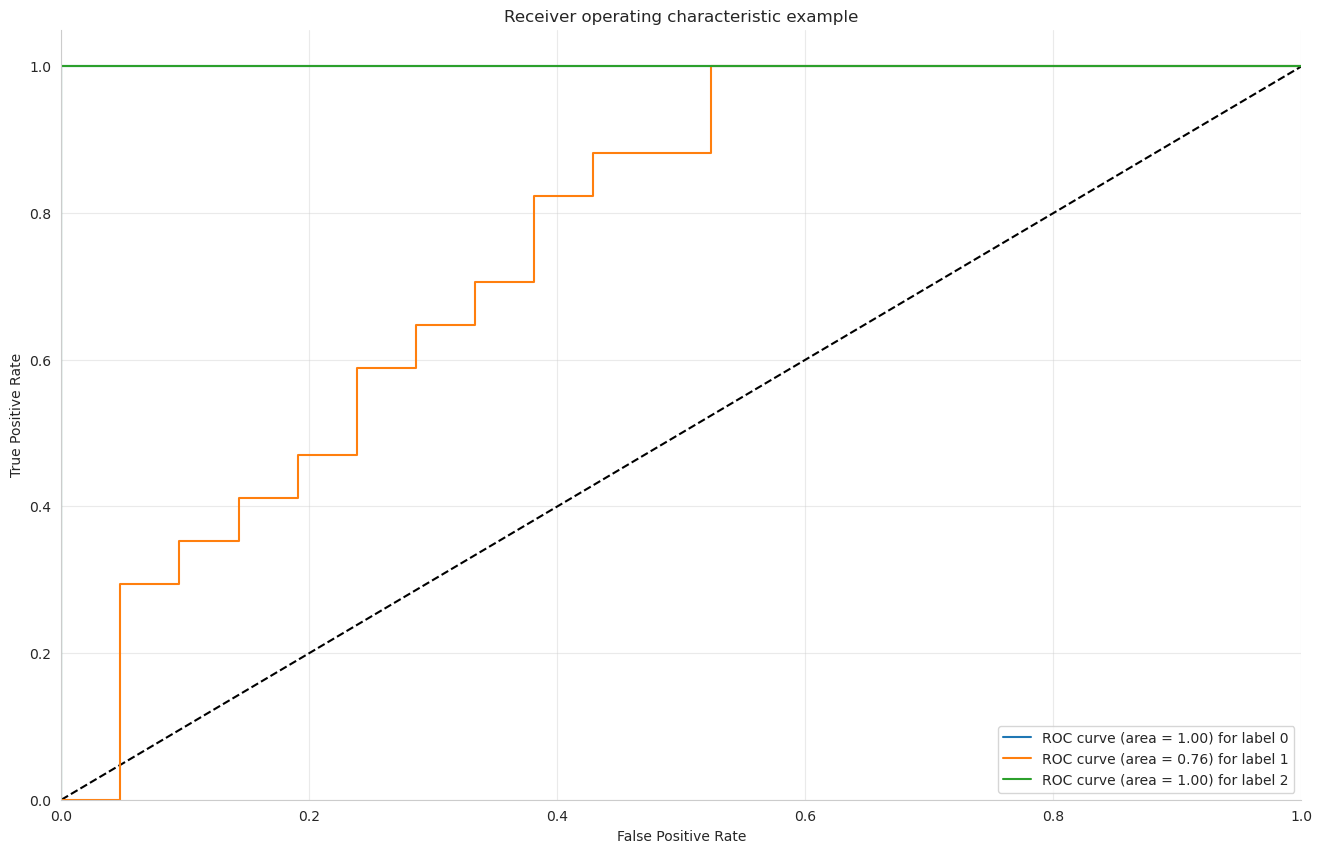

In [210]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

#### Example 3 - Logistic Regression

In [4]:
train = pd.read_csv("../project/data/titanic_train.csv")

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


With the heatmap, we can have a visual representation of which columns have missing values.

<Axes: >

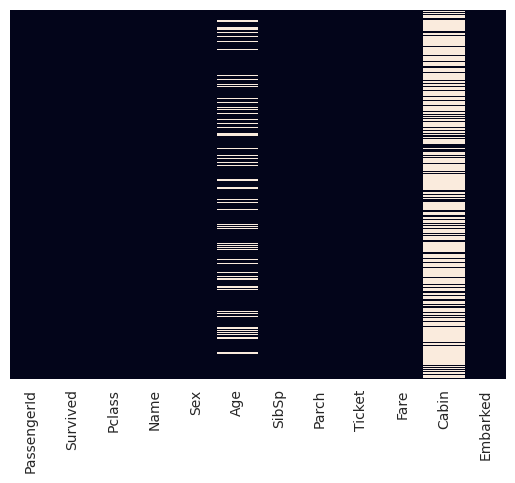

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

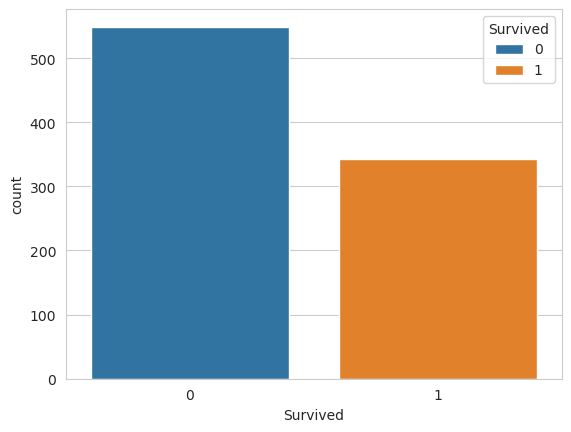

In [7]:
sns.countplot(x='Survived',data=train, hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

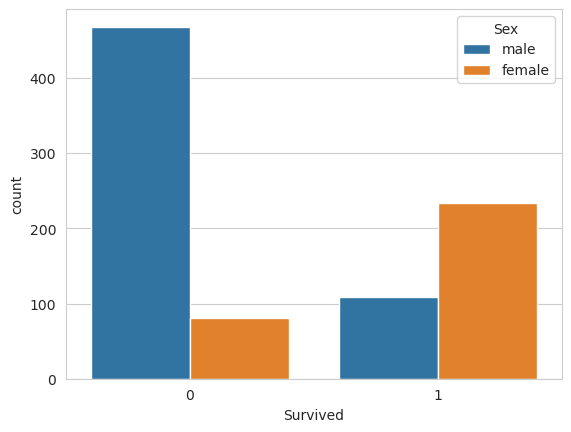

In [8]:
sns.countplot(x='Survived',data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

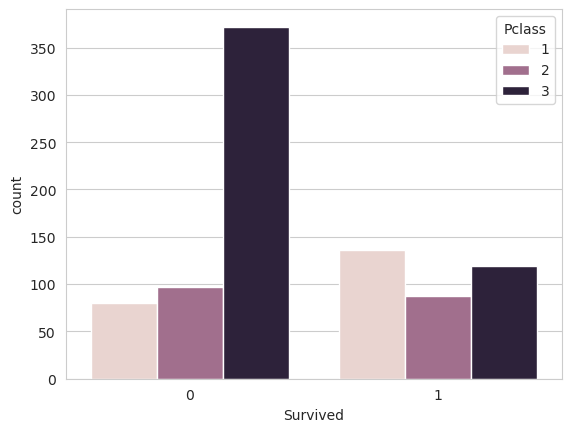

In [9]:
sns.countplot(x='Survived',data=train, hue='Pclass')


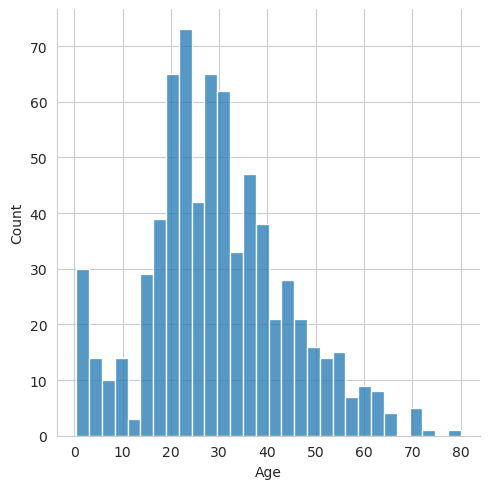

In [10]:
sns.displot(train['Age'].dropna(), bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

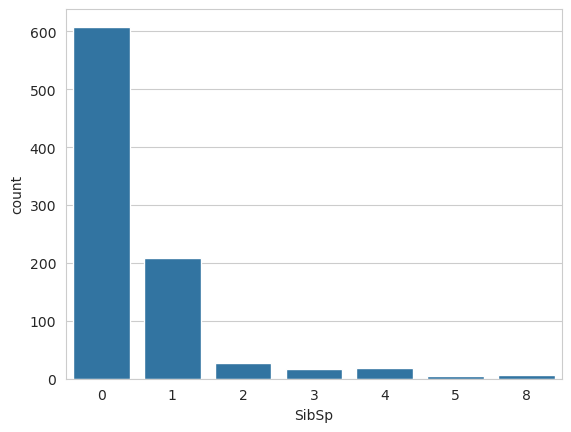

In [11]:
sns.countplot(x='SibSp', data=train)

<Axes: >

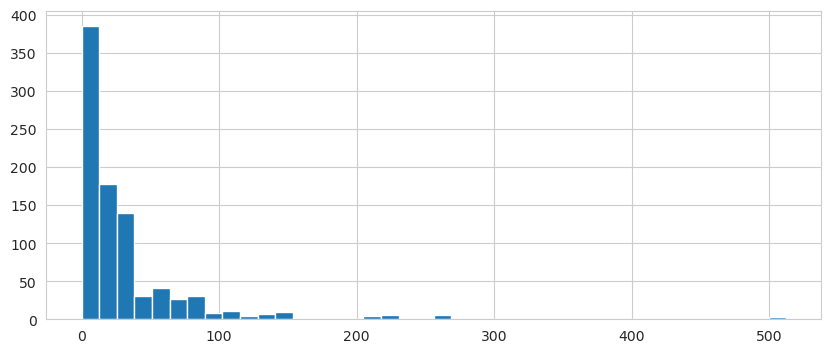

In [12]:
train['Fare'].hist(bins=40, figsize=(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

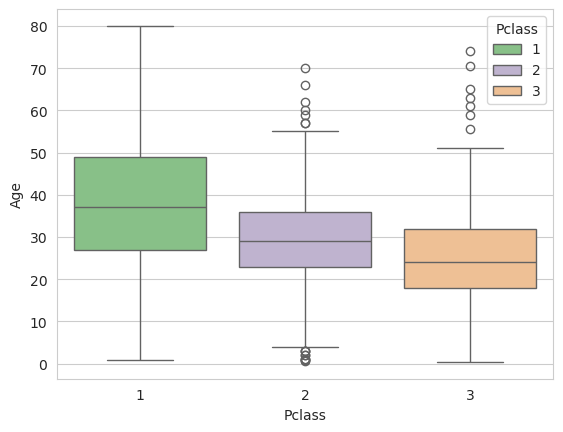

In [13]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=train, hue='Pclass', palette='Accent')

In [14]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

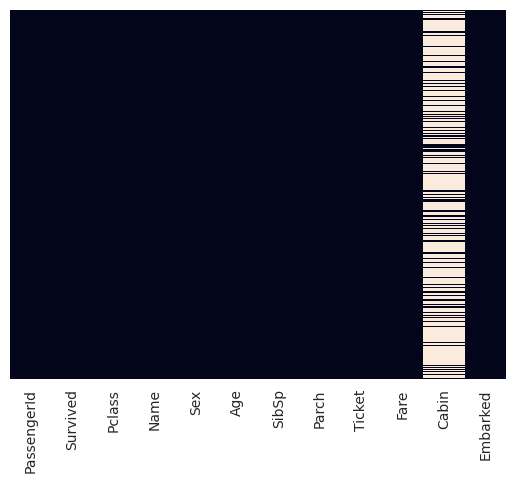

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [17]:
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

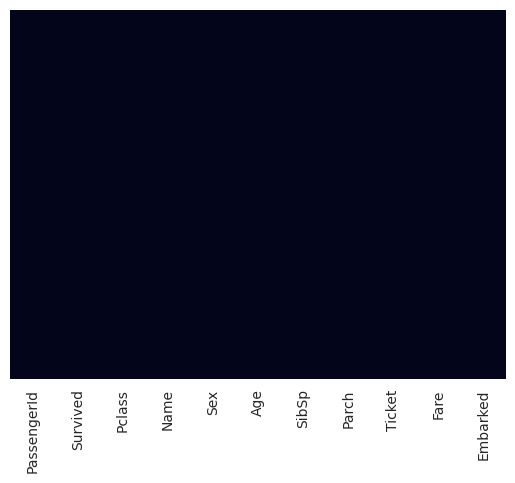

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

Let's convert the categorical features to dummy variables

In [19]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [21]:
embark = pd.get_dummies(train['Embarked'])
embark.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [22]:
embark = pd.get_dummies(train['Embarked'], drop_first=True, prefix='emb')

In [23]:
embark.head()

,emb_Q,emb_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [24]:
train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [26]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,emb_Q,emb_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [28]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression(max_iter=200)

In [33]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]])

In [39]:
y_proba = logmodel.predict_proba(X_test)

I'll generate a random passenger and see how they would fare.

In [40]:
import random

def generate_origin_port():
    options = [(0, 0, 1), (1, 0, 0), (0, 1, 0)]
    return random.choice(options)


def generate_random_passenger():
    pclass = random.choice([1, 2, 3])
    age = random.uniform(0.42, 80)
    sibsp = random.randint(0, 8)
    parch = random.randint(0, 6)
    fare = random.uniform(0, 512.3292)
    male = random.choice([0, 1])
    # q = random.choice([0, 1])
    # s = random.choice([0, 1])
    c, q, s = generate_origin_port()

    df_rand = pd.DataFrame({
        'Pclass': [pclass],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'male': [male],
        'emb_Q': [q],
        'emb_S': [s],
        #'emb_C': [c]
    })
    return df_rand
generate_random_passenger()

,Pclass,Age,SibSp,Parch,Fare,male,emb_Q,emb_S
0,2,63.759974,6,0,503.807579,1,1,0


In [41]:
def predict_survival(logmodel, passenger):
    LOGIT_THRESHOLD = 0.5

    def get_survival_probabilities(y_proba):
        survival_prob = y_proba[0][1]
        death_prob = y_proba[0][0]
        return survival_prob, death_prob

    def get_survival_outcome(survival_prob):
        if survival_prob > LOGIT_THRESHOLD:
            print("The random passenger survived!")
        else:
            print("The random passenger died :(")

    y_proba = logmodel.predict_proba(passenger)
    survival_prob, death_prob = get_survival_probabilities(y_proba)

    def get_passenger_port(passenger):
        if passenger['emb_Q'][0] == 0 and passenger['emb_S'][0]  == 0:
            return 'Cherbourg'
        elif passenger['emb_Q'][0] == 1 and passenger['emb_S'][0] == 0:
            return 'Queenstown'
        else:
            return 'Southampton'

    def get_passenger_sex(passenger):
        if passenger['male'].values[0] == 1:
            return 'M'
        else:
            return 'F'

    def get_passenger_info(passenger):

       print(f"Random passenger info: Class {passenger['Pclass'].values[0]}, "
              f"Age: {passenger['Age'].values[0]:.0f}, "
              f"Sex: {get_passenger_sex(passenger)}, "
              f"Siblings/Spouse: {passenger['SibSp'].values[0]}, "
              f"Parents/Children: {passenger['Parch'].values[0]}, "
              f"Fare: {passenger['Fare'].values[0]:.2f}, "
              f"Port: {get_passenger_port(passenger)} "  )


    get_survival_outcome(survival_prob)
    get_passenger_info(passenger)
    print(f"Survival probability: {survival_prob:.2f}")

predict_survival(logmodel, generate_random_passenger())

The random passenger died :(
Random passenger info: Class 3, Age: 60, Sex: F, Siblings/Spouse: 7, Parents/Children: 1, Fare: 204.34, Port: Southampton 
Survival probability: 0.08


#### Example 4 - Logistic Regression

In [42]:
ads = pd.read_csv("../project/data/advertising.csv")

In [43]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [44]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [45]:
ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


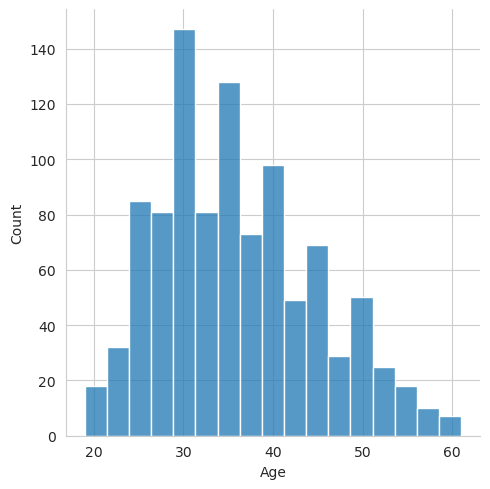

In [46]:
sns.displot(ads['Age'])

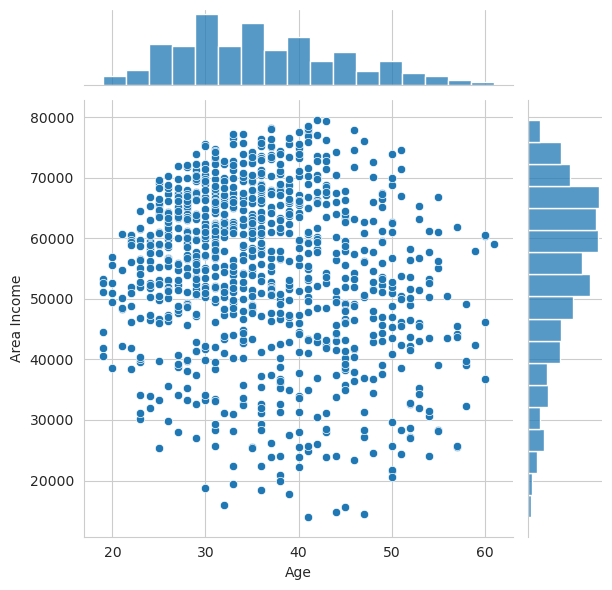

In [47]:
sns.jointplot(x='Age', y='Area Income', data=ads)

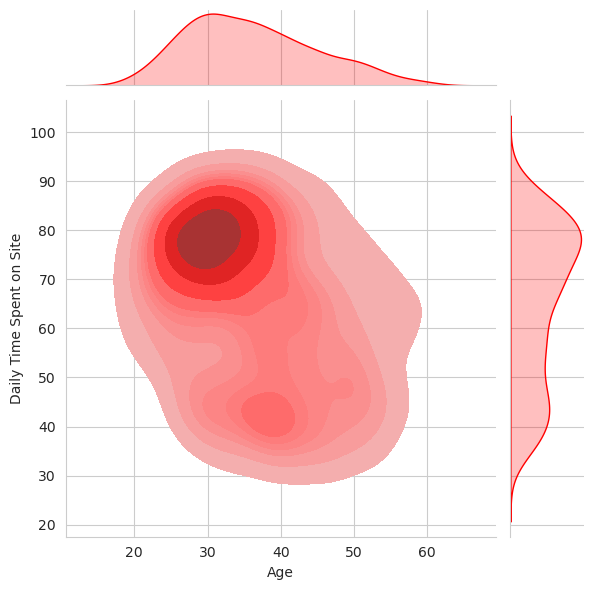

In [48]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ads, kind='kde', color='red', fill=True)

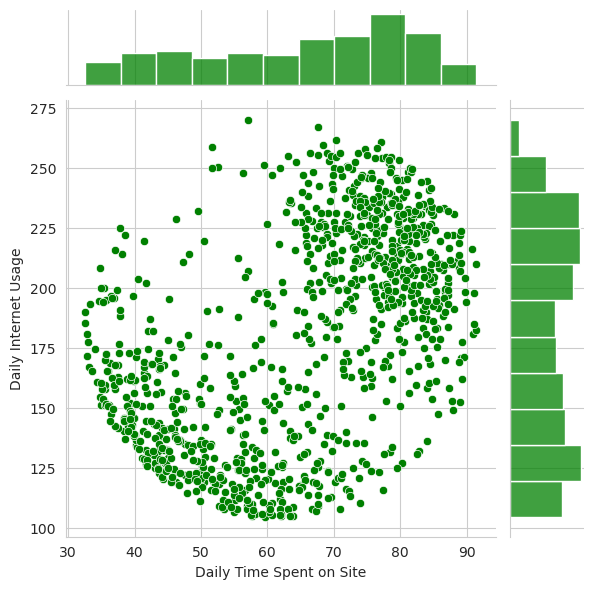

In [49]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ads, color='green')

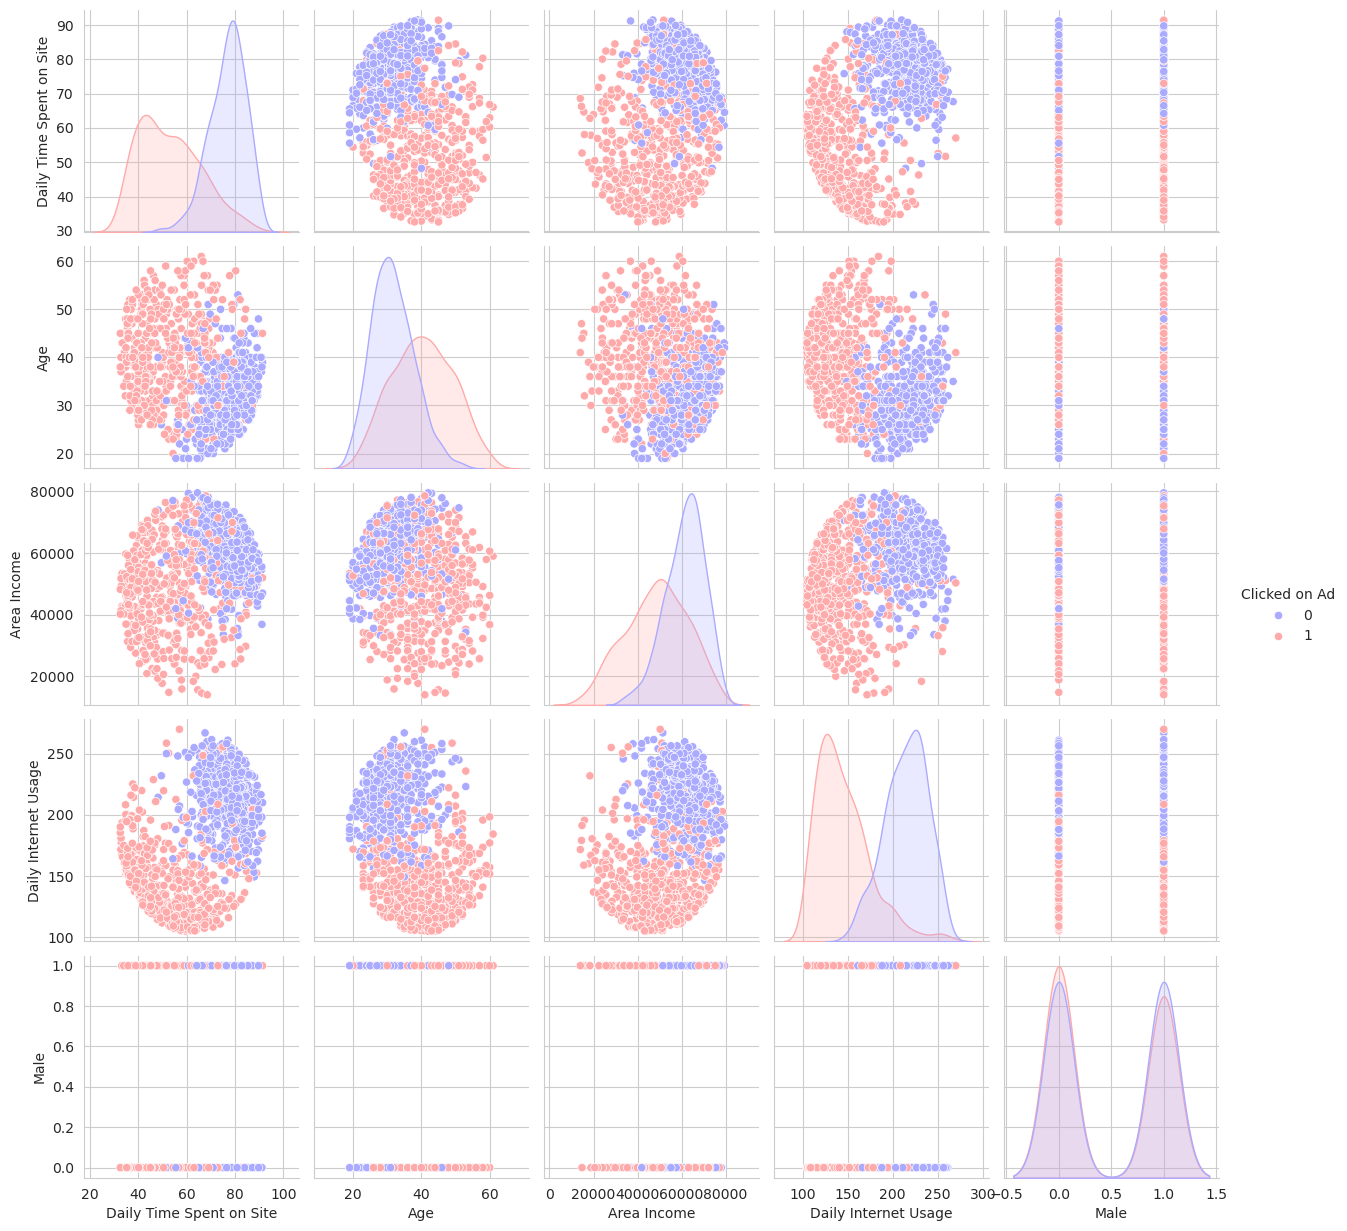

In [50]:
sns.pairplot(ads, hue='Clicked on Ad', palette='bwr')

In [51]:
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ads['Clicked on Ad']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [56]:
confusion_matrix(y_test, predictions)

array([[155,   2],
       [  5, 138]])